In [83]:
import torch
import torch.nn as nn
import torchvision
from tqdm import tqdm

In [126]:
train_batch_size = 16
train = torchvision.datasets.MNIST('MNIST', train=True,
                               transform=torchvision.transforms.ToTensor())
test = torchvision.datasets.MNIST('MNIST', train=False, transform=torchvision.transforms.ToTensor())

train_dataloader = torch.utils.data.DataLoader(train, batch_size=train_batch_size)
test_dataloader = torch.utils.data.DataLoader(test)

In [6]:
import matplotlib.pyplot as plt

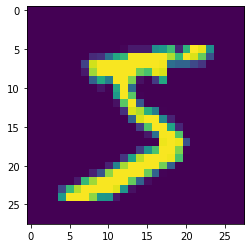

In [20]:
plt.imshow(train[0][0].squeeze(0))

In [16]:
train[0][1]

5

In [24]:
28 * 28

784

In [158]:
def flatten(x):
    return x.view(x.shape[0], -1)

class FirstNetwork(nn.Module):
    
    def __init__(self):
        super(FirstNetwork, self).__init__()
        self.first_layer = nn.Linear(784, 200)
        self.second_layer = nn.Linear(200, 10)
        
    def forward(self, x):
        logits = self.second_layer(nn.functional.relu(self.first_layer(flatten(x))))
        return nn.functional.softmax(logits, dim=-1)
    
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        self.first_conv = nn.Conv2d(1, 5, kernel_size=3, padding=1)
        self.MaxPool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        self.second_conv = nn.Conv2d(5, 5, kernel_size=3, padding=1)
        self.final_layer = nn.Linear(245,10)
        
    def forward(self, x):
        first_result = self.relu(self.MaxPool(self.first_conv(x)))
        print(first_result.shape)
        second_result = self.relu(self.MaxPool(self.second_conv(first_result)))
        print(second_result.shape)
        logits = self.final_layer(flatten(second_result))
        return nn.functional.softmax(logits, dim=-1)
    
def get_accuracy(net, test_dataloader):
    total = 0
    correct = 0
    with torch.no_grad():
        for X, y in tqdm(test_dataloader):
            output = torch.argmax(net(X)[0])
            if output == y:
                correct += 1
            total += 1
        return correct / total
    

In [164]:
get_accuracy(net, train_dataloader)

  0%|          | 0/3750 [00:00<?, ?it/s]

torch.Size([16, 5, 14, 14])
torch.Size([16, 5, 7, 7])


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [162]:
net = ConvNet()#FirstNetwork()
optimizer = torch.optim.SGD(net.parameters(), lr=3e-5)
losses = []

In [151]:
for X, y in tqdm(train_dataloader):
    optimizer.zero_grad()
    output = net(X)
    loss = torch.sum(-1 * torch.log(output.gather(1, y.reshape(-1, 1)))) / train_batch_size
    loss.backward()
    optimizer.step()
    losses.append(loss.detach())

100%|██████████| 3750/3750 [00:20<00:00, 179.83it/s]


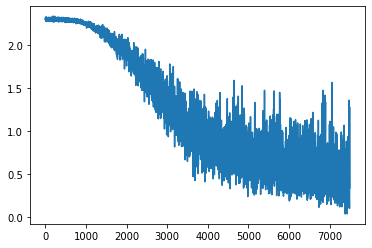

In [152]:
plt.plot(losses)

In [101]:
losses = []
for X, y in tqdm(train_dataloader):
    for _ in range(800):
        optimizer.zero_grad()
        output = net(X)

        loss = torch.sum(-1 * torch.log(output.gather(1, y.reshape(-1, 1))))
        loss.backward()
        optimizer.step()
        losses.append(loss.detach())
    break

  0%|          | 0/3750 [00:00<?, ?it/s]


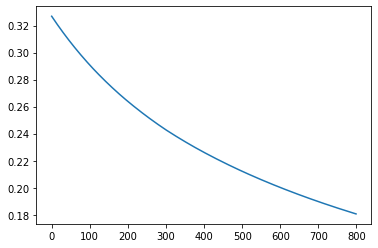

In [102]:
plt.plot(losses)

In [103]:
net(X)

tensor([[5.2298e-04, 9.2800e-06, 4.0658e-04, 8.5075e-03, 2.2015e-08, 9.8976e-01,
         3.3538e-06, 6.8154e-04, 3.2333e-05, 7.4302e-05],
        [9.9918e-01, 1.4679e-09, 2.8591e-05, 2.0843e-06, 3.5530e-09, 7.7959e-04,
         3.7940e-07, 8.8445e-06, 9.3074e-07, 1.7926e-06],
        [2.1513e-04, 1.2741e-04, 2.8226e-03, 7.3932e-03, 9.7037e-01, 7.1998e-04,
         1.6652e-03, 2.7596e-03, 7.4508e-04, 1.3181e-02],
        [2.9054e-06, 9.8995e-01, 3.2398e-03, 2.9175e-04, 3.2482e-05, 3.3432e-04,
         1.0298e-04, 3.4576e-04, 5.6725e-03, 2.9731e-05],
        [5.1394e-07, 1.7638e-05, 1.7019e-06, 2.2326e-06, 9.2074e-03, 2.3919e-05,
         4.9540e-06, 1.4322e-02, 2.4426e-04, 9.7618e-01],
        [4.2161e-04, 2.9302e-06, 9.9667e-01, 2.4537e-04, 1.0240e-06, 2.4218e-04,
         5.3933e-06, 6.2361e-04, 6.0840e-04, 1.1758e-03],
        [3.3856e-09, 9.9920e-01, 4.9390e-05, 3.7129e-04, 1.0918e-06, 1.0225e-04,
         9.5268e-06, 3.9299e-05, 2.0354e-04, 2.1473e-05],
        [1.7522e-04, 5.5916